In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X_blob, y_blob = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

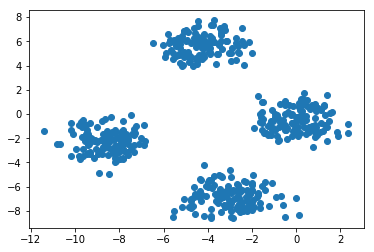

In [2]:
plt.scatter(X_blob[:,0], X_blob[:,1])
plt.show()

In [3]:
def scratch_DBSCAN(x, eps, min_pts): 
    """ 
    param x (list of vectors): your dataset to be clustered
    param eps (float): neighborhood radius threshold 
    param min_pts (int): minimum number of points threshold for a 
    neighborhood to be a cluster 
    """

    # Build a label holder that is comprised of all 0s
    labels = [0]* x.shape[0] 

    # Arbitrary starting "current cluster" ID
    C = 0 

    # For each point p in x... 
    # ('p' is the index of the datapoint, rather than the datapoint 
    #itself.)
    for p in range(0, x.shape[0]):
        # Only unvisited points can be evaluated as neighborhood centers 
        if not (labels[p] == 0): 
            continue
        # Find all of p's neighbors. 
        neighbors = neighborhood_search(x, p, eps)
         
        # If there are not enough neighbor points, then it is classified as 
        #noise (-1).
        # Otherwise we can use this point as a neighborhood cluster 
        if len(neighbors) < min_pts:
            labels[p] = -1
        else:
            C += 1
            neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts)
    return labels

def neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts):

    # Assign the cluster label to original point 
    labels[p] = C 
     
    # Look at each neighbor of p (by index, not the points themselves) and
    #evaluate
    i = 0
    while i < len(neighbors):
        # Get the next point from the queue.
        potential_neighbor_ix = neighbors[i]
        # If potential_neighbor_ix is noise from previous runs, we can assign it to current cluster 
        if labels[potential_neighbor_ix] == -1: 
            labels[potential_neighbor_ix] = C 
         
        # Otherwise, if potential_neighbor_ix is unvisited, we can add it to current cluster 
        elif labels[potential_neighbor_ix] == 0: 
            labels[potential_neighbor_ix] = C 
             
            # Further find neighbors of potential neighbor 
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps) 
             
            if len(potential_neighbors_cluster) >= min_pts: 
                neighbors = neighbors + potential_neighbors_cluster       
         
        # Evaluate next neighbor 
        i += 1         

def neighborhood_search(x, p, eps): 
    neighbors = [] 
     
    # For each point in the dataset... 
    for potential_neighbor in range(0, x.shape[0]): 
         
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list 
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps: 
            neighbors.append(potential_neighbor) 
             
    return neighbors

In [4]:
labels = scratch_DBSCAN(X_blob, 0.6, 5)

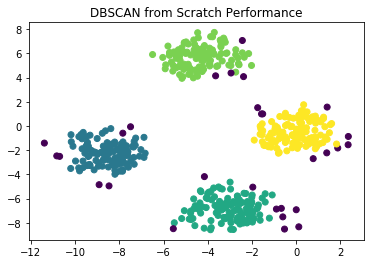

In [9]:
plt.scatter(X_blob[:,0], X_blob[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

In [10]:
import unittest
class TestScratchDBSCAN(unittest.TestCase):
    def test_scratch_DBSCAN(self):
        labels = scratch_DBSCAN(X_blob, 0.6, 5)
        self.assertEqual(labels,[-1,1,1,2,3,2,
 3,
 3,
 4,
 1,
 4,
 3,
 3,
 2,
 3,
 -1,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 -1,
 4,
 2,
 4,
 1,
 4,
 3,
 4,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 4,
 4,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 2,
 2,
 2,
 1,
 3,
 -1,
 3,
 3,
 3,
 2,
 4,
 2,
 1,
 -1,
 3,
 3,
 4,
 -1,
 4,
 1,
 3,
 1,
 4,
 2,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 4,
 1,
 3,
 3,
 4,
 3,
 2,
 1,
 1,
 3,
 -1,
 3,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 3,
 3,
 2,
 4,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 4,
 1,
 1,
 3,
 4,
 4,
 4,
 1,
 4,
 2,
 3,
 1,
 3,
 3,
 1,
 2,
 4,
 1,
 -1,
 2,
 1,
 3,
 1,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 -1,
 2,
 3,
 2,
 3,
 1,
 4,
 4,
 4,
 4,
 1,
 1,
 3,
 2,
 -1,
 3,
 2,
 4,
 2,
 3,
 2,
 1,
 2,
 4,
 1,
 4,
 3,
 4,
 2,
 1,
 1,
 4,
 4,
 1,
 2,
 4,
 3,
 3,
 4,
 1,
 3,
 3,
 3,
 1,
 4,
 2,
 2,
 3,
 3,
 3,
 3,
 1,
 -1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 -1,
 3,
 3,
 1,
 1,
 4,
 1,
 4,
 -1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 4,
 1,
 4,
 2,
 4,
 2,
 3,
 3,
 1,
 1,
 4,
 3,
 4,
 2,
 4,
 1,
 2,
 -1,
 2,
 3,
 4,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 4,
 3,
 2,
 4,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 3,
 4,
 2,
 4,
 -1,
 1,
 4,
 1,
 3,
 3,
 4,
 -1,
 4,
 4,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 4,
 4,
 1,
 3,
 -1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 4,
 -1,
 4,
 3,
 4,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 4,
 3,
 4,
 3,
 -1,
 2,
 2,
 1,
 4,
 4,
 3,
 -1,
 4,
 1,
 3,
 1,
 -1,
 1,
 2,
 3,
 3,
 1,
 4,
 -1,
 2,
 3,
 3,
 4,
 2,
 3,
 4,
 1,
 -1,
 2,
 4,
 3,
 -1,
 2,
 3,
 4,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 4,
 2,
 4,
 4,
 -1,
 2,
 4,
 1,
 1,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 3,
 2,
 3,
 -1,
 4,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 4,
 -1,
 2,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 4,
 4,
 3,
 2,
 2,
 4,
 4,
 2,
 3,
 2,
 2,
 1,
 4,
 4,
 4,
 3,
 3,
 2,
 4,
 4,
 -1,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 -1,
 3,
 1,
 4,
 3,
 4,
 4,
 1,
 4,
 1,
 3,
 4,
 3])
        
        
        

In [11]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestScratchDBSCAN)
unittest.TextTestRunner(verbosity=2).run(suite)

test_scratch_DBSCAN (__main__.TestScratchDBSCAN) ... ok

----------------------------------------------------------------------
Ran 1 test in 2.086s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>